# CNN Example

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import backend as K

import matplotlib.pyplot as plt
from random import randint

## Check if GPU is avalilable

In [2]:
tf.config.list_physical_devices('GPU')

[]

## Load Data

In [3]:
num_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


## Visualize data

 --- Example 1 --- 


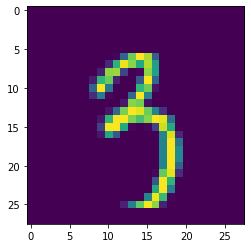

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 --- Example 2 --- 


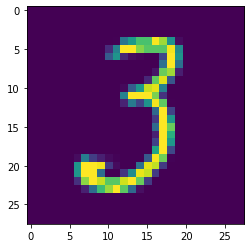

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 --- Example 3 --- 


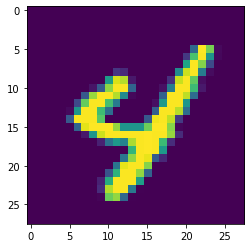

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 --- Example 4 --- 


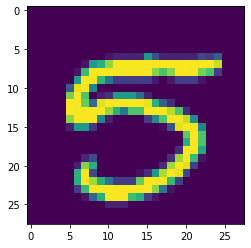

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 --- Example 5 --- 


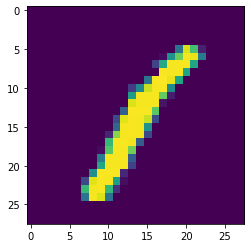

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
for i in range(5):
    print(' --- Example ' + str(i+1)+ ' --- ')
    rand_index = randint(0, x_train.shape[0])
    plt.imshow(x_train[rand_index])
    plt.show()
    print(y_train[rand_index])

## Create Model

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

## Learn Model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 18s 42ms/step - loss: 0.3597 - accuracy: 0.8931 - val_loss: 0.0831 - val_accuracy: 0.9782
Epoch 2/15
422/422 [==============================] - 18s 42ms/step - loss: 0.1108 - accuracy: 0.9663 - val_loss: 0.0573 - val_accuracy: 0.9845
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0826 - accuracy: 0.9748 - val_loss: 0.0484 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0695 - accuracy: 0.9786 - val_loss: 0.0450 - val_accuracy: 0.9872
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0609 - accuracy: 0.9814 - val_loss: 0.0370 - val_accuracy: 0.9898
Epoch 6/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0350 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 16s 37ms/step - loss: 0.0524 - accuracy: 0.9835 - val_loss: 0.0364 - val_accuracy:

## Validate Results

In [7]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024143123999238014
Test accuracy: 0.9921000003814697


## Visualize predictions

 --- Prediction 1 --- 


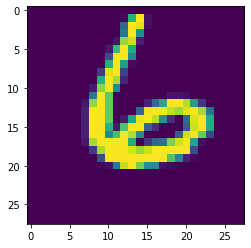

NN output:  [[9.0525415e-10 1.9109021e-15 8.4829097e-12 6.7692952e-12 2.3282865e-08
  9.6386277e-09 1.0000000e+00 4.3452458e-14 3.9325276e-10 1.4468953e-13]]
Highest activation:  6
 --- Prediction 2 --- 


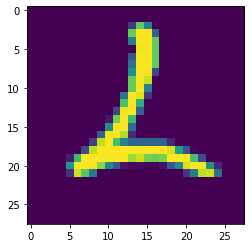

NN output:  [[2.4686662e-09 7.5234997e-01 2.4667133e-01 6.8514049e-11 8.5178297e-04
  8.1920311e-09 1.2692546e-04 7.9189433e-11 3.5398806e-08 7.6309300e-14]]
Highest activation:  1
 --- Prediction 3 --- 


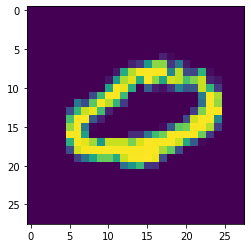

NN output:  [[9.9206078e-01 2.2983851e-11 1.4415206e-04 8.4284302e-08 2.4229635e-06
  2.1045422e-05 2.1288352e-04 8.7671776e-07 1.6023008e-05 7.5418036e-03]]
Highest activation:  0
 --- Prediction 4 --- 


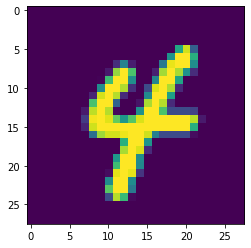

NN output:  [[8.9424675e-13 3.3010530e-12 7.0320826e-11 1.1960418e-11 9.9999177e-01
  1.5761801e-09 1.7849758e-10 5.3022308e-07 7.6912847e-06 4.0408416e-08]]
Highest activation:  4
 --- Prediction 5 --- 


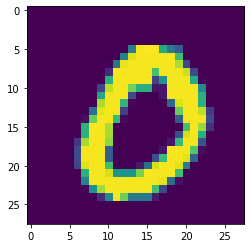

NN output:  [[9.9999940e-01 1.2293789e-13 4.1104219e-08 1.1814763e-11 2.5801568e-12
  1.3286902e-09 3.7775780e-07 7.8691365e-10 1.3161957e-07 9.0731928e-10]]
Highest activation:  0


In [8]:
for i in range(5):
    print(' --- Prediction ' + str(i+1)+ ' --- ')
    rand_index = randint(0, x_test.shape[0])
    
    x_data = x_test[rand_index]
    prediction = model.predict(np.expand_dims(x_data, axis=0))
    
    plt.imshow(x_data)
    plt.show()
    print('NN output: ', prediction)
    print('Highest activation: ', np.argmax(prediction))